# Neural network model
`Keras` implementation

In [2]:

from math import floor

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils, plot_model
from keras.callbacks import EarlyStopping
from keras.regularizers import l1
from keras.initializers import RandomNormal, Orthogonal

# note: RandomNormal(mean = 0.0, stddev = 0.05, seed = None)
#       Orthogonal(gain = 1.0, seed = None)

from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

from scipy import stats
import numpy as np

import pickle

Using TensorFlow backend.


In [10]:
dataSet_clean = True

if (dataSet_clean == True):
    fileID = open(r'C:\Users\Matteo\Desktop\MasterThesis\newThread\DS_model\DataSet_list_clean.pkl', 'rb')
else:
    fileID = open(r'C:\Users\Matteo\Desktop\MasterThesis\newThread\DS_model\DataSet_list_noised.pkl', 'rb')
#end

DataSet = pickle.load(fileID)
fileID.close()

X = DataSet[0]
Y = DataSet[1]

print(type(X)," Dim: ",X.shape,"\n",X)
print(type(Y)," Dim: ",Y.shape,"\n",Y)
print("\n")

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 20)

print("X: train dims = {}, test dims = {}\n".format(Xtrain.shape, Xtest.shape))
print("Y: train dims = {}, test dims = {}\n".format(Ytrain.shape, Ytest.shape))

M = Xtrain.shape[1]
nCat = Ytrain.shape[1]

<class 'numpy.ndarray'>  Dim:  (2000, 1023) 
 [[ 1.  1. -1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 ...
 [ 1.  1. -1. ... -1. -1. -1.]
 [ 1.  1. -1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]]
<class 'numpy.ndarray'>  Dim:  (2000, 32) 
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


X: train dims = (1400, 1023), test dims = (600, 1023)

Y: train dims = (1400, 32), test dims = (600, 32)



Train on 1260 samples, validate on 140 samples
Epoch 1/150
1260/1260 [==============================] - 4s 3ms/step - loss: 3.4455 - acc: 0.0619 - val_loss: 3.4002 - val_acc: 0.0786
Epoch 2/150
1260/1260 [==============================] - 1s 564us/step - loss: 3.1880 - acc: 0.1397 - val_loss: 3.1650 - val_acc: 0.0786
Epoch 3/150
1260/1260 [==============================] - 1s 670us/step - loss: 2.9334 - acc: 0.2500 - val_loss: 2.7998 - val_acc: 0.3786
Epoch 4/150
1260/1260 [==============================] - 1s 620us/step - loss: 2.6045 - acc: 0.3944 - val_loss: 2.5459 - val_acc: 0.2857
Epoch 5/150
1260/1260 [==============================] - 1s 537us/step - loss: 2.2698 - acc: 0.5048 - val_loss: 2.2524 - val_acc: 0.4429
Epoch 6/150
1260/1260 [==============================] - 1s 595us/step - loss: 1.9440 - acc: 0.5952 - val_loss: 1.9246 - val_acc: 0.5214
Epoch 7/150
1260/1260 [==============================] - 1s 756us/step - loss: 1.6589 - acc: 0.6841 - val_loss: 1.6610 - val_acc: 0.4

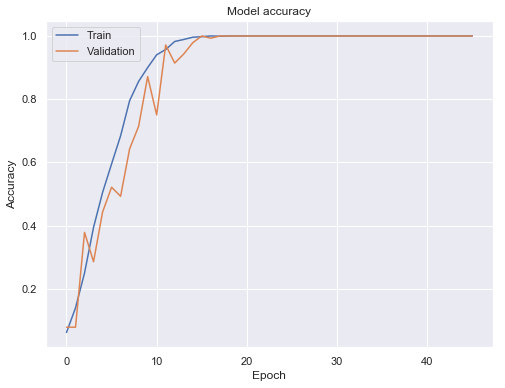

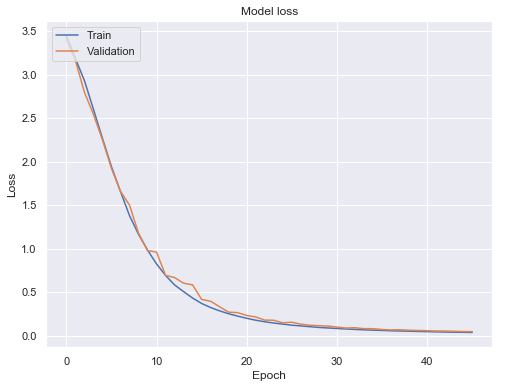

600/600 [==============================] - 0s 547us/step
Model evaluation on test data: loss and accuracy
 [0.04670819779237111, 1.0]
Wall time: 47.6 s


In [11]:
%%time
model = Sequential()

normal_init = RandomNormal(mean = 0.0, stddev = 0.05, seed = None)
#orth_init = Orthogonal(gain = 1.0, seed = None)

model.add(Dense(input_dim = M, units = 100,
                kernel_initializer = Orthogonal(gain = 1.5, seed = None),
                bias_initializer = RandomNormal(mean = 0.0, stddev = 0.1, seed = None),
                activation = 'relu'))
#model.add(Dropout(rate=0.3))
#model.add(Dense(units = 200,
#               kernel_initializer = Orthogonal(gain = 1.0, seed = None),
#               bias_initializer = RandomNormal(mean = 0.0, stddev = 0.1, seed = None),
#               activation = 'relu'))
#model.add(Dense(activation = 'relu', units = 100))
#model.add(Dense(activation = 'relu', units = 100))
#model.add(Dense(activation = 'relu', units = 80))
#model.add(Dense(activation = 'relu', units = 64))
model.add(Dense(units = nCat, activation = 'softmax'))

es1 = EarlyStopping(monitor='val_acc', mode='auto', patience = 30, verbose = 1)
es2 = EarlyStopping(monitor='val_loss', mode='auto',patience = 20, verbose = 1)

sgd = keras.optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.6, nesterov = True)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

history = model.fit(Xtrain, Ytrain, validation_split = 0.1, epochs = 150, verbose = 1, callbacks = [es1,es2])


plt.figure(figsize=(8,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


print("Model evaluation on test data: loss and accuracy\n",model.evaluate(Xtest,Ytest, verbose = 1))


# Weights distributions

In [12]:
weights = np.asarray(model.get_weights())

In [ ]:
fileID = open(r'C:\Users\Matteo\Desktop\MasterThesis\newThread\DS_model\weights_.pkl', 'wb')
pickle.dump(weights, fileID)
fileID.close()

In [ ]:
fileID = open(r'C:\Users\Matteo\Desktop\MasterThesis\newThread\DS_model\weights_.pkl', 'rb')
weights = pickle.load(fileID)
fileID.close()

In [13]:
# weights is a 4 entry list.
# weights[0] is the  weights matrix of the input -> hidden layer
# weights[1] is the bias vector of the input -> hidden layer
# weights[2] is the  weights matrix of the hidden -> output layer
# weights[3] is the bias vector of the hidden -> output layer

weights = np.asarray(model.get_weights())


wghs1 = weights[0]
wghs1 = wghs1.flatten()
print(wghs1.shape)

bss1 = weights[1]
bss1 = bss1.flatten()
print(bss1.shape)

wghs2 = weights[2]
wghs2 = wghs2.flatten()
print(wghs2.shape)

bss2 = weights[3]
bss2 = bss2.flatten()
print(bss2.shape)

(102300,)
(100,)
(3200,)
(32,)


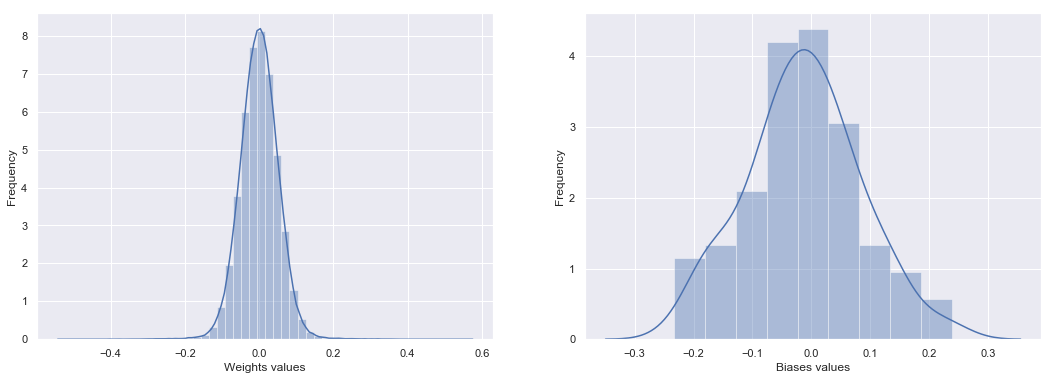

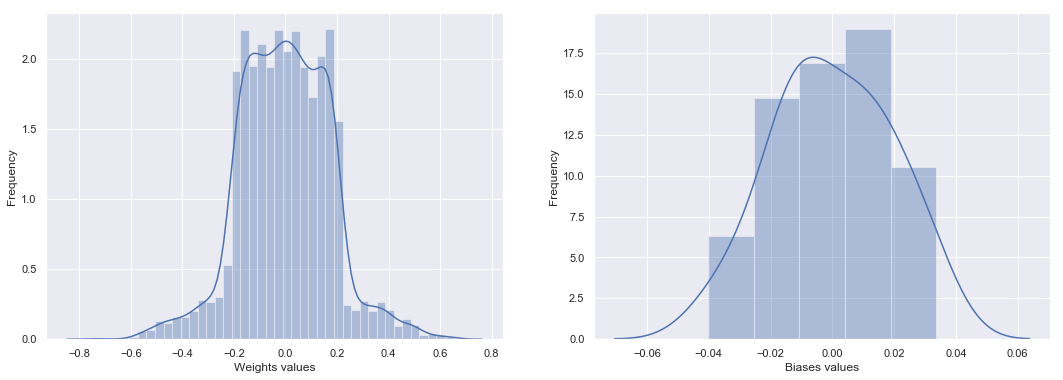

In [14]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(wghs1, rug = False, kde = True, norm_hist = True)
plt.xlabel("Weights values")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.distplot(bss1, rug = False, kde = True, norm_hist = True)
plt.xlabel("Biases values")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(wghs2, rug = False, kde = True, norm_hist = True)
plt.xlabel("Weights values")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.distplot(bss2, rug = False, kde = True, norm_hist = True)
plt.xlabel("Biases values")
plt.ylabel("Frequency")
plt.show()